<a href="https://colab.research.google.com/github/Daimonic7/CEE490/blob/main/HW6/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  del sys.path[0]


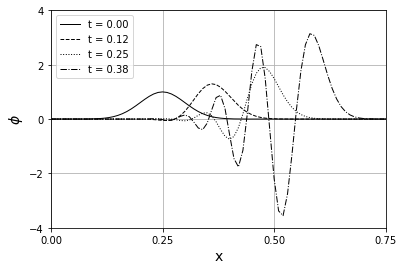

In [115]:
# Central Difference + Forward Euler

from pylab import*
from scipy.sparse import diags
# Setup
clf()
dx = 0.01
dt = 0.01
c = 1.

X = r_[-4.:4:dx]
N = len(X)
B = asmatrix(diags(array([-1.*ones(N-2), zeros(N-1), ones(N-2)]), [-1, 0, 1]).toarray())

B[-1,-1] = 2.
B[-1,-2] = -2.

u = asmatrix(exp(-200.*(X-0.25)**2)).T
u[0] = 0.

# System of ODEs ???
f = lambda u: vstack([0., -c/2./dx*B*u[1::]])
# Explicit Euler
t_final = .4
time = r_[0.:t_final+dt:dt]
pt = array([0., .12, .25, .375])
pn = len(pt)
pc = 0
rt = asmatrix(zeros([1, pn]))
S = asmatrix(zeros([N, pn]))

for t in time:
    # plot storage
    try:
        if (t >= pt[pc]):
            S[:,pc] = u
            rt[0,pc] = t
            pc += 1
            if (pc > pn):
                break
    except:
        pass
        # time advancement
    u = u + dt*f(u)

# Plot unstable figure
figure(1)
linstyl = ["-", "--", ":", "-.", ".-"]
for i in range(pn):
    plot(X, S[:,i], "k%s" % linstyl[i], lw = 1., label = "t = %.2f" % rt[0,i])
xlim([0., .75]); #ylim([-4., 4.])
ax = gca()
ax.set_xticks([0., .25, .5, .75])
ax.set_yticks([-4., -2., 0., 2., 4.])
grid(axis="both")
xlabel("x", fontsize = 14)
ylabel(r'$\phi$', fontsize=14)
legend(loc = "upper left")

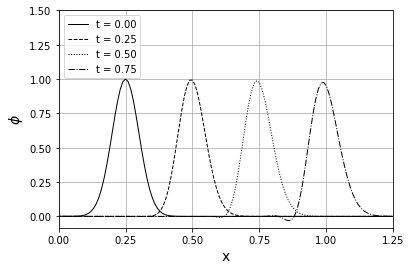

In [116]:
# Central Difference + Fourth-order Runge-Kutta

# reset initial condition
u = asmatrix(exp(-200.*(X-0.25)**2)).T
u[0] = 0.

t_final = .8
time = r_[0:t_final+dt:dt]
pt = array([0., .25, .50, .75])
pn = len(pt)
pc = 0
rt = asmatrix(zeros([1, pn]))
S = asmatrix(zeros([N, pn]))

for t in time:
    # plot storage
    try:
        if (t >= pt[pc]):
            S[:,pc] = u
            rt[0,pc] = t
            pc += 1
            if (pc > pn):
                break
    except:
        pass
    # time advancement
    u1 = dt*f(u)
    u2 = dt*f(u+u1/2.)
    u3 = dt*f(u+u2/2.)
    u4 = dt*f(u+u3)
    u = u + (u1 + 2.*u2 + 2.*u3 + u4)/6.

# Plot stable figure
figure(2)
for i in range(pn):
    plot(X, S[:,i], "k%s" % linstyl[i], lw = 1., label = "t = %.2f" % rt[0,i])
xlim([0., 1.25]); #ylim([-.1, 1.5])
ax = gca()
ax.set_xticks([0., .25, .5, .75, 1., 1.25])
ax.set_yticks([0., .25, .5, .75, 1., 1.25, 1.5])
grid("on")
xlabel("x", fontsize = 14)
ylabel(r'$\phi$', fontsize=14)
legend(loc = "upper left")
show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


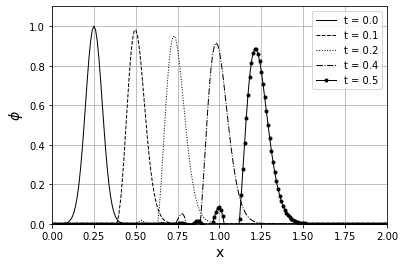

In [117]:
# Central Difference + Crank-Nicolson
import numpy as np
from pylab import*
from scipy.sparse import diags, eye as speye

# Example 5.4
# Crank-Nicolson for the Heat Equation
from pylab import*
from scipy.sparse import diags, eye as speye
# Setup
clf()
c = 1.
dx = 0.01
#X = linspace(0., L, N)
X = r_[-4.:4:dx]
N = len(X)

# initial condition
#T = sin(pi*X)
T = asmatrix(exp(-200.*(X-0.25)**2)).T

# Spatial derivative operator
#A = asmatrix(diags(array([ones(N-3), -2.*ones(N-2), ones(N-3)]), [-1, 0, 1]).toarray())
A = asmatrix(diags(array([-1.*ones(N-3), zeros(N-2), ones(N-3)]), [-1, 0, 1]).toarray())

# Time advancement
# Must solve the system 

# $$\left(I-\frac{\alpha dt}{2dx^2}A\right) T^{n+1} = \left(I+\frac{\alpha dt}{2dx^2}A\right) T^{n} + \frac{dt}{2}\left(f(t^{n+1})+f(t^n)\right)$$
#g = lambda t, dt, T: linalg.solve(speye(N-2) - alpha*dt/2./(dx**2)*A, T[1:N-1] + alpha*dt/2./(dx**2)*A*T[1:N-1] + dt*(f(t)+f(t+dt))/2.)
g = lambda t, dt, T: linalg.solve(speye(N-2) + c*dt/(2*dx)*A, T[1:N-1] - c*dt/(2*dx)*A*T[1:N-1])

# Stable run
dt = 0.01            # time step
t_final = .5        # final time
time = r_[0.:t_final+dt:dt]  # time array
pt = array([0.0, 0.125, 0.25, 0.375, 0.5])   # desired plot times
pn = len(pt)         # number of desired plots
pc = 0               # plot counter
rt = asmatrix(zeros([1, pn]))
S = asmatrix(zeros([N, pn])) # solution storage

for t in time:
    # plot storage
    if (t >= pt[pc]):
        S[:,pc] = T
        rt[0,pc] = t
        pc += 1
        if (pc > pn):
            break

    # time advancement
    T[1:N-1] = g(t,dt,T)

# Plot stable run
figure(1)
linstyl = ["-", "--", ":", "-.", ".-"]
for i in range(pn):
    plot(X, S[:,i], "k%s" % linstyl[i], lw = 1., label = "t = %.1f" % rt[0,i])
xlabel("x", fontsize = 14)
ylabel(r'$\phi$', fontsize=14)
legend(loc = 0)
xlim([0., 2.]); ylim([0., 1.1])
ax = gca()
#ax.set_xticks([0., .25, .5, .75, 1.])
#ax.set_yticks([0., .25, .5, .75, 1.])
grid("on")
show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  del sys.path[0]


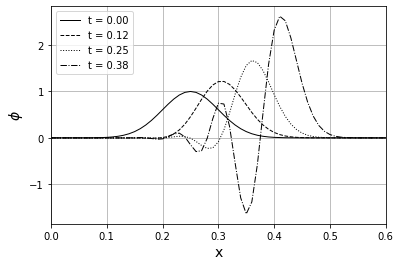

In [118]:
# Upwind + Forward Euler

from pylab import*
from scipy.sparse import diags
# Setup
clf()
dx = 0.01
dt = 0.01
c = 1.

X = r_[-4.:4:dx]
N = len(X)
B = asmatrix(diags(array([zeros(N-2), -1*ones(N-1), ones(N-2)]), [-1, 0, 1]).toarray())
B[-1,-1] = 2.
B[-1,-2] = -2.

u = asmatrix(exp(-200.*(X-0.25)**2)).T
u[0] = 0.

# System of ODEs ???
f = lambda u: vstack([0., -c/2./dx*B*u[1::]])
# Explicit Euler
t_final = .4
time = r_[0.:t_final+dt:dt]
pt = array([0., .12, .25, .375])
pn = len(pt)
pc = 0
rt = asmatrix(zeros([1, pn]))
S = asmatrix(zeros([N, pn]))

for t in time:
    # plot storage
    try:
        if (t >= pt[pc]):
            S[:,pc] = u
            rt[0,pc] = t
            pc += 1
            if (pc > pn):
                break
    except:
        pass
        # time advancement
    u = u + dt*f(u)

# Plot unstable figure
figure(1)
linstyl = ["-", "--", ":", "-.", ".-"]
for i in range(pn):
    plot(X, S[:,i], "k%s" % linstyl[i], lw = 1., label = "t = %.2f" % rt[0,i])
xlim([0., .6]); #ylim([-4., 4.])
ax = gca()
#ax.set_xticks([0., .1, .2, .3])
#ax.set_yticks([-4., -2., 0., 2., 4.])
grid(axis="both")
xlabel("x", fontsize = 14)
ylabel(r'$\phi$', fontsize=14)
legend(loc = "upper left")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  del sys.path[0]


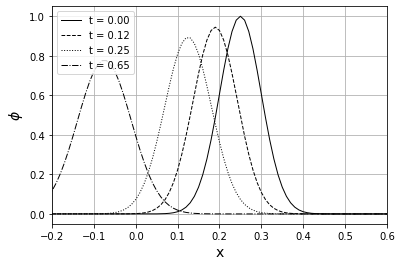

In [120]:
# Upwind + Forward Euler (c = -1)

from pylab import*
from scipy.sparse import diags
# Setup
clf()
dx = 0.01
dt = 0.01
c = -1.

X = r_[-4.:4:dx]
N = len(X)
B = asmatrix(diags(array([zeros(N-2), -1*ones(N-1), ones(N-2)]), [-1, 0, 1]).toarray())
B[-1,-1] = 2.
B[-1,-2] = -2.

u = asmatrix(exp(-200.*(X-0.25)**2)).T
u[0] = 0.

# System of ODEs ???
f = lambda u: vstack([0., -c/2./dx*B*u[1::]])
# Explicit Euler
t_final = .7
time = r_[0.:t_final+dt:dt]
pt = array([0., .12, .25, .65])
pn = len(pt)
pc = 0
rt = asmatrix(zeros([1, pn]))
S = asmatrix(zeros([N, pn]))

for t in time:
    # plot storage
    try:
        if (t >= pt[pc]):
            S[:,pc] = u
            rt[0,pc] = t
            pc += 1
            if (pc > pn):
                break
    except:
        pass
        # time advancement
    u = u + dt*f(u)

# Plot unstable figure
figure(1)
linstyl = ["-", "--", ":", "-.", ".-"]
for i in range(pn):
    plot(X, S[:,i], "k%s" % linstyl[i], lw = 1., label = "t = %.2f" % rt[0,i])
xlim([-.2, .6]); #ylim([-4., 4.])
ax = gca()
#ax.set_xticks([0., .1, .2, .3])
#ax.set_yticks([-4., -2., 0., 2., 4.])
grid(axis="both")
xlabel("x", fontsize = 14)
ylabel(r'$\phi$', fontsize=14)
legend(loc = "upper left")